Following code from  https://www.youtube.com/watch?v=3oA_griyboI&t=235s
It's not used for the project but it's what I based the next to recorder off of which I used to gather some of the data

start recording


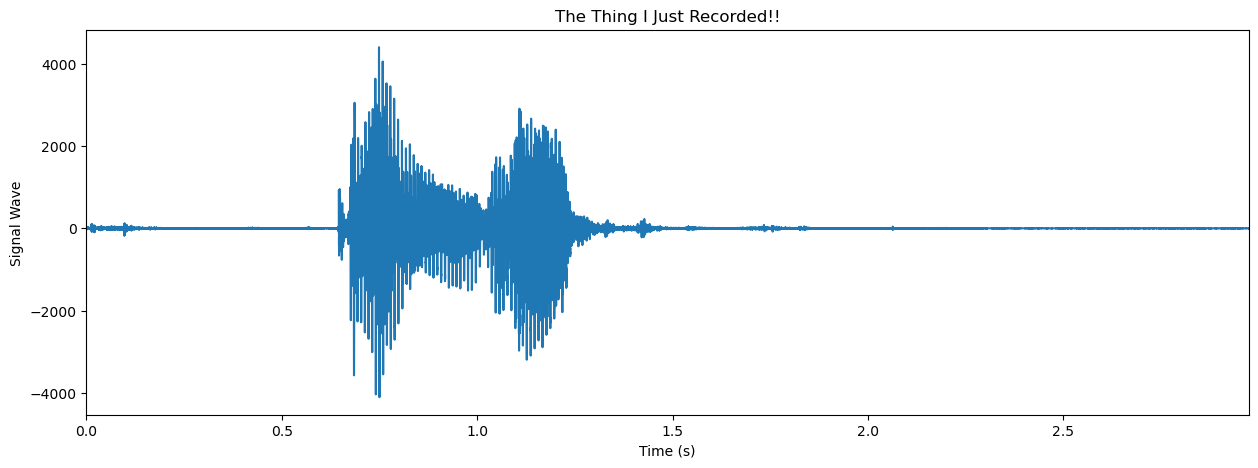

In [38]:
# python -m pip install pyaudio
import pyaudio
import wave
import matplotlib.pyplot as plt
import numpy as np

FRAMES_PER_BUFFER = 3200
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100

pa = pyaudio.PyAudio()

stream = pa.open(
    format=FORMAT,
    channels=CHANNELS,
    rate=RATE,
    input=True,
    frames_per_buffer=FRAMES_PER_BUFFER
)

print('start recording')

seconds = 3
frames = []
second_tracking = 0
second_count = 0
for i in range(0, int(RATE/FRAMES_PER_BUFFER*seconds)):
    data = stream.read(FRAMES_PER_BUFFER)
    frames.append(data)
    second_tracking += 1
    if second_tracking == RATE/FRAMES_PER_BUFFER:
        second_count += 1
        second_tracking = 0
        print(f'Time Left: {seconds - second_count} seconds')


stream.stop_stream()
stream.close()
pa.terminate()

obj = wave.open('lemaster_tech.wav', 'wb')
obj.setnchannels(CHANNELS)
obj.setsampwidth(pa.get_sample_size(FORMAT))
obj.setframerate(RATE)
obj.writeframes(b''.join(frames))
obj.close()


file = wave.open('lemaster_tech.wav', 'rb')

sample_freq = file.getframerate()
frames = file.getnframes()
signal_wave = file.readframes(-1)

file.close()

time = frames / sample_freq


# if one channel use int16, if 2 use int32
audio_array = np.frombuffer(signal_wave, dtype=np.int16)

times = np.linspace(0, time, num=frames)

plt.figure(figsize=(15, 5))
plt.plot(times, audio_array)
plt.ylabel('Signal Wave')
plt.xlabel('Time (s)')
plt.xlim(0, time)
plt.title('The Thing I Just Recorded!!')
plt.show()

This cell was used to test if conversion to stereo made a difference with inference.

In [39]:
import wave
import struct

def convert_to_stereo(mono_file, stereo_file):
    # Open the mono audio file
    with wave.open(mono_file, 'rb') as wav_in:
        # Get the audio data and parameters
        data = wav_in.readframes(wav_in.getnframes())
        channels = wav_in.getnchannels()
        sample_width = wav_in.getsampwidth()
        sample_rate = wav_in.getframerate()

    # Split the mono channel data into a list of samples
    mono_samples = struct.unpack_from('<{}h'.format(len(data)//sample_width), data)

    # Mix the mono and duplicated channels together
    stereo_samples = []
    for sample in mono_samples:
        stereo_samples.append(sample)
        stereo_samples.append(sample)

    # Convert the mixed samples back to bytes
    stereo_data = struct.pack('<{}h'.format(len(stereo_samples)), *stereo_samples)

    # Open the stereo audio file and write the mixed audio data
    with wave.open(stereo_file, 'wb') as wav_out:
        wav_out.setnchannels(2)
        wav_out.setsampwidth(sample_width)
        wav_out.setframerate(sample_rate)
        wav_out.writeframes(stereo_data)

In [40]:
convert_to_stereo('lemaster_tech.wav', 'stereo_audio.wav')

In [ ]:
#Create 50 more recoing  adapted from code above

In [2]:
# python -m pip install pyaudio
import pyaudio
import wave
import os

FRAMES_PER_BUFFER = 3200
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100
RECORDING_LENGTH = 3  # seconds
RECORDING_COUNT = 50  # number of recordings to make
OUTPUT_DIR = '/Users/sheilalong/Desktop/random_words_pyaudio'

if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

pa = pyaudio.PyAudio()

for i in range(RECORDING_COUNT):
    stream = pa.open(
        format=FORMAT,
        channels=CHANNELS,
        rate=RATE,
        input=True,
        frames_per_buffer=FRAMES_PER_BUFFER
    )

    print(f'Recording {i+1}/{RECORDING_COUNT} - start recording')

    frames = []
    time_left = RECORDING_LENGTH
    for j in range(int(RATE/FRAMES_PER_BUFFER*RECORDING_LENGTH)):
        data = stream.read(FRAMES_PER_BUFFER)
        frames.append(data)
        time_left -= FRAMES_PER_BUFFER/RATE
        time_message = f'Recording {i+1}/{RECORDING_COUNT} - Time left: {time_left:.2f} seconds'
        print(time_message, end='\r')

    stream.stop_stream()
    stream.close()

    filename = os.path.join(OUTPUT_DIR, f'recording_s3_{i+1}.wav')

    obj = wave.open(filename, 'wb')
    obj.setnchannels(CHANNELS)
    obj.setsampwidth(pa.get_sample_size(FORMAT))
    obj.setframerate(RATE)
    obj.writeframes(b''.join(frames))
    obj.close()

    print(f'Recording {i+1}/{RECORDING_COUNT} - saved to {filename}')

pa.terminate()


Recording 1/50 - start recording
Recording 1/50 - saved to /Users/sheilalong/Desktop/random_words_pyaudio/recording_s3_1.wav
Recording 2/50 - start recording
Recording 2/50 - saved to /Users/sheilalong/Desktop/random_words_pyaudio/recording_s3_2.wav
Recording 3/50 - start recording
Recording 3/50 - saved to /Users/sheilalong/Desktop/random_words_pyaudio/recording_s3_3.wav
Recording 4/50 - start recording
Recording 4/50 - saved to /Users/sheilalong/Desktop/random_words_pyaudio/recording_s3_4.wav
Recording 5/50 - start recording
Recording 5/50 - saved to /Users/sheilalong/Desktop/random_words_pyaudio/recording_s3_5.wav
Recording 6/50 - start recording
Recording 6/50 - saved to /Users/sheilalong/Desktop/random_words_pyaudio/recording_s3_6.wav
Recording 7/50 - start recording
Recording 7/50 - saved to /Users/sheilalong/Desktop/random_words_pyaudio/recording_s3_7.wav
Recording 8/50 - start recording
Recording 8/50 - saved to /Users/sheilalong/Desktop/random_words_pyaudio/recording_s3_8.wav


In [ ]:
#create 50 more lower quality recordings 

In [ ]:
import sounddevice as sd
import soundfile as sf
import os
import time
# Set the recording parameters
fs = 44100  # Sample rate
seconds = 3  # Duration of recording

# Set the output directory
output_dir = "/Users/sheilalong/Desktop/new_throngler"

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Change the working directory to the output directory
os.chdir(output_dir)

# Loop over the number of samples to record
for i in range(50):
    print(f"Recording sample {i+1}...")
    # Start recording
    myrecording = sd.rec(int(seconds * fs), samplerate=fs, channels=1)
    # Print the number of seconds remaining
    for j in range(seconds, 0, -1):
        print(f"{j} seconds remaining...")
        time.sleep(1)
    # Wait for recording to finish
    sd.wait()
    # Save the recording to a WAV file
    filename = f"sample_{i+1}.wav"
    sf.write(filename, myrecording, fs)
    print(f"Sample {i+1} saved to {filename}")

print("Recording complete.")
